# 6570083221

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 9.6/9.6 MB 25.2 MB/s eta 0:00:00


In [ ]:
!pip install beautifulsoup4

# Data cleaning

- remove html tags and remove space at the beginning and the end.

In [ ]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
# len(train_df.occupation_group.unique())

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
title = []
for i in range(train_df.shape[0]):
    html_text = str(train_df.iloc[i].job_title)
    soup = BeautifulSoup(html_text, "html.parser")
    text = soup.get_text().strip().lower()
    title.append(text)

In [ ]:
train_df = train_df.drop(['job_title'], axis=1)
train_df.to_csv("cleaned_train_2.csv")

In [ ]:
test_df = pd.read_csv("test_for_submission.csv")
title = []
for i in range(test_df.shape[0]):
    html_text = str(test_df.iloc[i].job_title)
    soup = BeautifulSoup(html_text, "html.parser")
    text = soup.get_text().strip().lower()
    title.append(text)

In [ ]:
test_df = test_df.drop(['job_title'], axis=1)
test_df.to_csv("cleaned_test.csv")

In [ ]:
del train_df, test_df

## Import Libs

In [3]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import pandas as pd 
import os

from torch.utils.data import Dataset
from IPython.display import display
from pythainlp.tokenize import word_tokenize
from collections import defaultdict
from sklearn.metrics import accuracy_score

In [4]:
def set_all_seeds(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True

set_all_seeds(9)

## Loading data
First, we load the data from disk into a Dataframe.

A Dataframe is essentially a table, or 2D-array/Matrix with a name for each column.

In [133]:
data_df = pd.read_csv('/content/drive/MyDrive/NLP_Midterm/cleaned_train_2.csv')
test_df = pd.read_csv('/content/drive/MyDrive/NLP_Midterm/cleaned_test.csv')

Let's preview the data.

In [94]:
# Show the top 5 rows
display(data_df.head())

,Unnamed: 0,occupation_group,occupation,occupation_group_index,occupation_index,title
0,0,Top Level Executive,Executive Manager,142,211,à¸œà¸¹à¹‰à¹à¸—à¸™à¸à¹ˆà¸²à¸¢à¸šà¸£à¸´à¸«à¸²à¸£
1,1,Pharmacist,Pharmacist,107,413,à¹€à¸ à¸ªà¸±à¸Šà¸à¸£ à¸ªà¸²à¸‚à¸²à¹à¸«à¸¥à¸¡à¸‰à¸šà¸±à¸‡
2,2,Teacher,Health and Physical Education Teacher,140,276,à¸„à¸£à¸¹à¸œà¸¹à¹‰à¸ªà¸­à¸™à¸§à¸´à¸Šà¸²à¸ªà¸¸à¸‚à¸¨à¸¶à¸à¸©à¸²
3,3,Air Traffic Control,Air Traffic Control,7,23,atc
4,4,Engineering,Energy Engineer,50,195,energy monitoring engineer


In [95]:
test_df.head()

,Unnamed: 0,Id,job_title,title
0,0,0,à¸ˆà¸±à¸à¸©à¸¸à¹à¸žà¸—à¸¢à¹Œ (Ophthalmologist),à¸ˆà¸±à¸à¸©à¸¸à¹à¸žà¸—à¸¢à¹Œ (ophthalmologist)
1,1,1,Operator,operator
2,2,2,Water resources engineering,water resources engineering
3,3,3,à¸™à¸±à¸à¸§à¸´à¹€à¸—à¸¨à¸ªà¸±à¸¡à¸žà¸±à¸™à¸˜à¹Œ à¸›à¸£à¸°à¸ˆà¸³à¸à¸­à¸‡à¸§à¸´à¹€à¸—à¸¨à¸ªà¸±à¸¡à¸žà¸±à¸™à¸˜à¹Œ,à¸™à¸±à¸à¸§à¸´à¹€à¸—à¸¨à¸ªà¸±à¸¡à¸žà¸±à¸™à¸˜à¹Œ à¸›à¸£à¸°à¸ˆà¸³à¸à¸­à¸‡à¸§à¸´à¹€à¸—à¸¨à¸ªà¸±à¸¡à¸žà¸±à¸™à¸˜à¹Œ
4,4,4,Chemical Engineer,chemical engineer


In [134]:
test_df = test_df.drop(['job_title'], axis=1)

In [97]:
data_df['title'].describe()

count            8000
unique           6184
top       à¸œà¸¹à¹‰à¹€à¸‚à¸µà¸¢à¸™à¹à¸šà¸š
freq               14
Name: title, dtype: object

In [135]:
count = data_df['occupation_index'].value_counts().sort_index().to_list()

In [99]:
len(count)

597

In [136]:
x = []
y = []
z = []
for i in range(len(count)):
  if count[i] <= 9:
    x.append(i)
for i in range(len(count)):
  if count[i] >9 and count[i] <=14:
    y.append(i)
for i in range(len(count)):
  if count[i] >14 and count[i] <=17:
    z.append(i)

len(x), len(y), len(z)

(246, 199, 53)

In [137]:
# for i in x:
#   data_df_2 = data_df[data_df["occupation_index"]==i]
#   data_df = data_df.append([data_df_2]*4,ignore_index=True)
# for i in y:
#   data_df_2 = data_df[data_df["occupation_index"]==i]
#   data_df = data_df.append([data_df_2]*2,ignore_index=True)
# for i in y:
#   data_df_2 = data_df[data_df["occupation_index"]==i]
#   data_df = data_df.append([data_df_2],ignore_index=True)

for i in x:
  data_df_2 = data_df[data_df["occupation_index"]==i]
  data_df = data_df.append([data_df_2]*4,ignore_index=True)
for i in y:
  data_df_2 = data_df[data_df["occupation_index"]==i]
  data_df = data_df.append([data_df_2]*2,ignore_index=True)
for i in z:
  data_df_2 = data_df[data_df["occupation_index"]==i]
  data_df = data_df.append([data_df_2],ignore_index=True)

<ipython-input-137-e8fa8331e1f8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append([data_df_2]*4,ignore_index=True)
<ipython-input-137-e8fa8331e1f8>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append([data_df_2]*2,ignore_index=True)
<ipython-input-137-e8fa8331e1f8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append([data_df_2],ignore_index=True)


In [138]:
data_df.shape

(20754, 6)

In [139]:
import string
import re

def remove_punc(x):
  return x.translate(str.maketrans('','',string.punctuation))

data_df['title'] = data_df['title'].apply(remove_punc)
test_df['title'] = test_df['title'].apply(remove_punc)

In [140]:
data_df['title'] = data_df['title'].apply(lambda x: word_tokenize(x, engine = 'newmm'))
test_df['title'] = test_df['title'].apply(lambda x: word_tokenize(x, engine = 'newmm'))

In [141]:
data_df.head()

,Unnamed: 0,occupation_group,occupation,occupation_group_index,occupation_index,title
0,0,Top Level Executive,Executive Manager,142,211,"[à¸œà¸¹à¹‰à¹à¸—à¸™, à¸à¹ˆà¸²à¸¢à¸šà¸£à¸´à¸«à¸²à¸£]"
1,1,Pharmacist,Pharmacist,107,413,"[à¹€à¸ à¸ªà¸±à¸Šà¸à¸£, , à¸ªà¸²à¸‚à¸², à¹à¸«à¸¥à¸¡à¸‰à¸šà¸±à¸‡]"
2,2,Teacher,Health and Physical Education Teacher,140,276,"[à¸„à¸£à¸¹à¸œà¸¹à¹‰à¸ªà¸­à¸™, à¸§à¸´à¸Šà¸², à¸ªà¸¸à¸‚à¸¨à¸¶à¸à¸©à¸²]"
3,3,Air Traffic Control,Air Traffic Control,7,23,[atc]
4,4,Engineering,Energy Engineer,50,195,"[energy, , monitoring, , engineer]"


In [142]:
all_the_string = list([])
for sentence in data_df['title']:
  for i in  sentence:
    all_the_string.append(i)

np_str = np.array(list(all_the_string))
all_char = np.unique(np_str)
all_char

array([' ', ' \t', '  ', ..., 'â€™', 'â€œ', 'â€'], dtype='<U33')

In [143]:
sorted(all_char)
print("There are %d unique chars in the data set" % len(all_char))
print(all_char)
char_map = dict(zip(all_char, range(len(all_char))))

There are 4968 unique chars in the data set
[' ' ' \t' '  ' ... 'â€™' 'â€œ' 'â€']


In [144]:
def data_mapping(x):
    global char_map
    data = []
    for i in x:
      data.append(char_map[i])
    return data

data_df['title'] = data_df['title'].apply(data_mapping)
data_df.head()

,Unnamed: 0,occupation_group,occupation,occupation_group_index,occupation_index,title
0,0,Top Level Executive,Executive Manager,142,211,"[3745, 3764]"
1,1,Pharmacist,Pharmacist,107,413,"[4673, 0, 4269, 4816]"
2,2,Teacher,Health and Physical Education Teacher,140,276,"[3035, 4125, 4314]"
3,3,Air Traffic Control,Air Traffic Control,7,23,[376]
4,4,Engineering,Energy Engineer,50,195,"[972, 0, 1677, 0, 978]"


In [145]:
def data_mapping(x):
    global char_map
    data = []
    for i in x:
      try:
        data.append(char_map[i])
      except:
        data.append(0)
    return data
test_df['title'] = test_df['title'].apply(data_mapping)

In [146]:
test_df.head()

,Unnamed: 0,Id,title
0,0,0,"[3128, 0, 1808]"
1,1,1,[1807]
2,2,2,"[2798, 0, 2255, 0, 980]"
3,3,3,"[3464, 4152, 0, 3628, 2907, 4152]"
4,4,4,"[609, 0, 978]"


## Preprocessing data for pytorch model

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [147]:
class JobDataset(Dataset):

  def __init__(self, data, label, label2):
    self.label = label
    self.data = data
    self.label2 = label2
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self,idx):
    # print(self.label[idx])
    # return torch.tensor(self.data[idx, 0]).to(device), torch.tensor(self.data[idx, 1], dtype=torch.long).to(device)
    return torch.IntTensor(self.data[idx]).to(device), torch.FloatTensor(self.label[idx]).to(device), torch.FloatTensor(self.label2[idx]).to(device)

In [148]:
# split data into train, validation, test  

data = data_df['title'].to_numpy()
label1 = data_df['occupation_index'].to_numpy()
label2 = data_df['occupation_group_index'].to_numpy()
label = np.stack((label1, label2), axis=-1)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, label, stratify=label1, test_size=0.16, random_state=20) # 20
# X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, stratify=y_test1, test_size=0.5, random_state=9)

In [149]:
y_train2 = y_train[:,1]
y_train = y_train[:,0]

y_val2 = y_val[:,1]
y_val = y_val[:,0]

In [150]:
X_test = test_df['title'].to_numpy()

In [151]:
max = 0
for i in X_train:
  if len(i) > max: max = len(i)

In [152]:
for i in X_val:
  if len(i) > max: max = len(i)

In [153]:
for i in X_test:
  if len(i) > max: max = len(i)
max

50

In [154]:
for i in range(len(X_train)):
  X_train[i] = np.pad(X_train[i], (0, max-len(X_train[i])), mode='constant')

for i in range(len(X_test)):
  X_test[i] = np.pad(X_test[i], (0, max-len(X_test[i])), mode='constant')
  
for i in range(len(X_val)):
  X_val[i] = np.pad(X_val[i], (0, max-len(X_val[i])), mode='constant')

In [155]:
y_train

array([202, 560,  39, ..., 572, 123, 217])

In [156]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

# y_test = onehot_encoder.fit_transform(y_test.reshape(-1,1))
y_val = onehot_encoder.fit_transform(y_val.reshape(-1,1))
y_train = onehot_encoder.fit_transform(y_train.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [157]:
y_val2 = onehot_encoder.fit_transform(y_val2.reshape(-1,1))
y_train2 = onehot_encoder.fit_transform(y_train2.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [158]:
y_val[0].shape, y_val2[0].shape

((597,), (154,))

In [ ]:
# !pip install transformers

In [ ]:
# from transformers import (
#     AutoConfig,
#     RobertaConfig,
#     AutoModelForMaskedLM,
#     AutoTokenizer,
#     AutoModelForSequenceClassification,
#     CamembertTokenizer,
#     pipeline,
#     Trainer,
#     TrainingArguments,
#     DataCollatorWithPadding
# )

In [ ]:
# model_config = AutoConfig.from_pretrained(
#         'airesearch/wangchanberta-base-att-spm-uncased',
#          revision='main',
#          num_labels=597
#     )


# model = AutoModelForSequenceClassification.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased',
#                                                         revision='main',
#                                                         config=model_config)

# model

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wa

# Build a model for classifying these job title.


In [159]:
# fifth try 128
# eight tyy 128 on linearn 1
# 12th try 256 on linear1
# 13th try 512
# 
# 15th try 256 / emb 128 à¸¡à¸²à¸•à¸¥à¸­à¸”
# 18th embeddingv256
# 19th embedding512

class BiLSTM(nn.Module):
    
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        drp = 0.1
        n_classes = 597
        self.embedding = nn.Embedding(len(char_map), 256)
        # self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        # self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(256, self.hidden_size, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(self.hidden_size*2 , 512)
        self.linear2 = nn.Linear(256,256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)

        self.out = nn.Linear(512, 597)
        self.out2 = nn.Linear(512, 154)


    def forward(self, x):
        #rint(x.size())
        h_embedding = self.embedding(x)
        #_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        # conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(max_pool))
        conc = self.dropout(conc)
        out2 = self.out2(conc)
        out = self.out(conc)
        return out, out2

model = BiLSTM().to(device)

In [34]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4148 sha256=b2751df3b77f69388c9e3192a47fdfb84151fcbe355b87a4bcdc99909b112c88
  Stored in directory: /root/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


## #TODO 3: Build and evaluate a model for "action" classification


In [160]:
##  prepare dataloader 

BATCHS_SIZE = 64
train_loader = DataLoader( JobDataset(X_train, y_train, y_train2), batch_size = BATCHS_SIZE, shuffle = True)
val_loader = DataLoader( JobDataset(X_val, y_val, y_val2), batch_size = BATCHS_SIZE)
y_test = y_train[:2798]
y_test2 = y_train2[:2798]
test_loader = DataLoader( JobDataset(X_test, y_test, y_test2), batch_size = BATCHS_SIZE)

In [161]:
for i,j,k in train_loader:
  print(model(i)[0].shape, model(i)[1].shape)
  break

torch.Size([64, 597]) torch.Size([64, 154])


In [162]:
del X_train, y_train, y_val, X_val

In [163]:
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=4, verbose=True, min_lr=1e-8)

best_val_loss = np.inf

In [164]:
## training loop

model_checkpoint_path = './BasicModel_weight1.h5'
# 18th try

NUM_EPOCHS = 30
for n_epoch in range(NUM_EPOCHS):

  train_loss = []
  model.train()
  for X_train, Y_train, Y_train2 in train_loader:
    optimizer.zero_grad()
    Y_pred,Y_pred2 = model(X_train)
    # print(Y_pred, Y_train)
    loss = criterion(Y_pred, Y_train)
    train_loss.append(loss)

    loss2 = criterion(Y_pred2, Y_train2)
    # print(loss2)
    # break
    loss = loss + 0.8*loss2
    loss.backward()
    optimizer.step()
  
  avg_train_loss = torch.stack(train_loss, axis = 0).mean()

  model.eval()
  with torch.inference_mode():
    val_loss = []
    val_acc = []
    y_val = []
    for X_val, Y_val, _ in val_loader:
      Y_pred, Y_pred2 = model(X_val)
      y_val.append(Y_pred)
      loss = criterion(Y_pred, Y_val)
      val_loss.append(loss)
    
    avg_val_loss = torch.stack(val_loss, axis = 0).mean()

    print("EPOCH :", n_epoch + 1)
    print(f" train_loss: {avg_train_loss}, LR: {optimizer.param_groups[0]['lr']}")
    print(f" val_loss: {avg_val_loss}, LR: {optimizer.param_groups[0]['lr']}")
    
  if avg_val_loss < best_val_loss:
    best_val_loss = avg_val_loss
    torch.save(model.state_dict(), model_checkpoint_path)

  scheduler.step(avg_val_loss)
  # break


EPOCH : 1
 train_loss: 5.062727928161621, LR: 0.001
 val_loss: 2.6229090690612793, LR: 0.001
EPOCH : 2
 train_loss: 1.462903380393982, LR: 0.001
 val_loss: 0.9755018949508667, LR: 0.001
EPOCH : 3
 train_loss: 0.5715715289115906, LR: 0.001
 val_loss: 0.643349826335907, LR: 0.001
EPOCH : 4
 train_loss: 0.331181138753891, LR: 0.001
 val_loss: 0.5224826335906982, LR: 0.001
EPOCH : 5
 train_loss: 0.2250339686870575, LR: 0.001
 val_loss: 0.5018488764762878, LR: 0.001
EPOCH : 6
 train_loss: 0.18534471094608307, LR: 0.001
 val_loss: 0.49032062292099, LR: 0.001
EPOCH : 7
 train_loss: 0.1619129627943039, LR: 0.001
 val_loss: 0.4865942895412445, LR: 0.001
EPOCH : 8
 train_loss: 0.1476651132106781, LR: 0.001
 val_loss: 0.4644777774810791, LR: 0.001
EPOCH : 9
 train_loss: 0.13608524203300476, LR: 0.001
 val_loss: 0.4613798260688782, LR: 0.001
EPOCH : 10
 train_loss: 0.12782229483127594, LR: 0.001
 val_loss: 0.4829302132129669, LR: 0.001
EPOCH : 11
 train_loss: 0.12496590614318848, LR: 0.001
 val_lo

In [ ]:
# Y_pred.shape, Y_train.shape

(torch.Size([26, 597]), torch.Size([53, 597]))

In [165]:
model_checkpoint_path = '/content/BasicModel_weight1.h5'
model.load_state_dict(torch.load(model_checkpoint_path))

<All keys matched successfully>

In [ ]:
len(X_test), len(y_test)

(2798, 2798)

In [ ]:
# predict classes of test data

from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def result(data_loader, model):
  model.eval()
  with torch.no_grad():

    model_results = []
    for x, target,_ in data_loader:
      y_pred,_ = model(x)
      y_pred = torch.argmax(y_pred, dim=1)
      model_results.extend(y_pred.cpu().numpy())
      
  return model_results

results = result(test_loader, model) 

In [ ]:
index = np.arange(2798)

In [ ]:
a = pd.DataFrame(list(zip(index,results)), columns=['Id','Predicted'])

In [ ]:
a.to_csv('eighteenth_try.csv', index = False) # save test's predicted class

In [166]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def evaluate(data_loader, model):
  model.eval()
  with torch.no_grad():

    model_results = []
    targets = []
    for x, target,_ in data_loader:
      y_pred,_ = model(x)
      y_pred = torch.argmax(y_pred, dim=1)
      model_results.extend(y_pred.cpu().numpy())
      target = torch.argmax(target, dim=1)
      targets.extend(target.cpu().numpy())

    # df_cm = pd.DataFrame(confusion_matrix(targets, model_results))
    # plt.figure(figsize = (10,7))
    # plt.title("Confusion Matrix")
    # sns.heatmap(df_cm, annot=True)
      
  return [accuracy_score(model_results,targets), f1_score(model_results,targets, average='macro')]
      
print("Val accuracy, Val F1 : ", evaluate(val_loader, model))

Val accuracy, Val F1 :  [0.9114724480578139, 0.9001864505405526]


In [39]:
from torchviz import make_dot

batch = next(iter(train_loader))
yhat = model(batch[0])

make_dot(yhat, params=dict(list(model.named_parameters()))).render("lstm_torchviz", format="png")

'rnn_torchviz.png'

In [173]:
!pip install torchview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


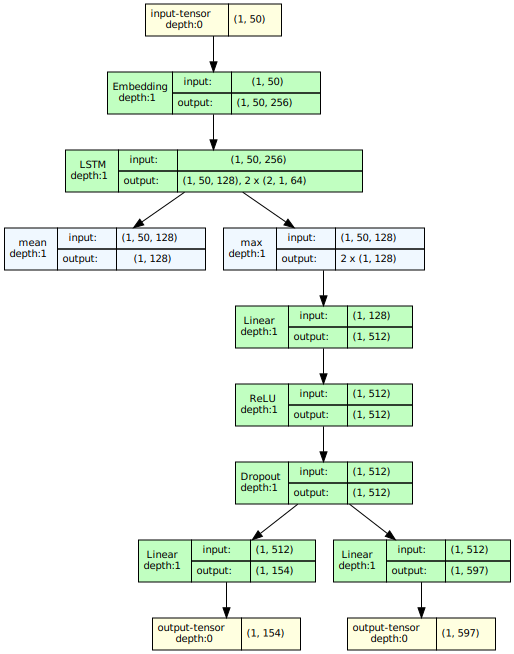

In [209]:
import torchvision
from torchview import draw_graph

model_graph = draw_graph(BiLSTM(), input_size=(1,50),dtypes=[torch.long], expand_nested=True, save_graph = True)
model_graph.visual_graph